# Crimes in Boston

### Second Dataset exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
crimes = pd.read_csv("../data/crime.csv", encoding = "ISO-8859-1")
offCodes = pd.read_csv("../data/offense_codes.csv", encoding = "ISO-8859-1")

In [35]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [7]:
print("Crimes")
print(crimes.info())
print("-" * 50)
print(offCodes.info())

Crimes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB
None
-----------------------------------

In [96]:
crimes.groupby('YEAR').count()['OFFENSE_CODE']

YEAR
2015     53388
2016     99114
2017    100886
2018     65685
Name: OFFENSE_CODE, dtype: int64

In [5]:
crimes.groupby('DAY_OF_WEEK').count()['OFFENSE_CODE']

DAY_OF_WEEK
Friday       48495
Monday       45679
Saturday     44818
Sunday       40313
Thursday     46656
Tuesday      46383
Wednesday    46729
Name: OFFENSE_CODE, dtype: int64

In [30]:
crimes.groupby('MONTH').count()['OFFENSE_CODE']

MONTH
1     23610
2     21653
3     24146
4     24086
5     26199
6     30568
7     34556
8     34823
9     26543
10    25737
11    23675
12    23477
Name: OFFENSE_CODE, dtype: int64

Text(0.5, 1.0, 'OFFENSES / YEAR')

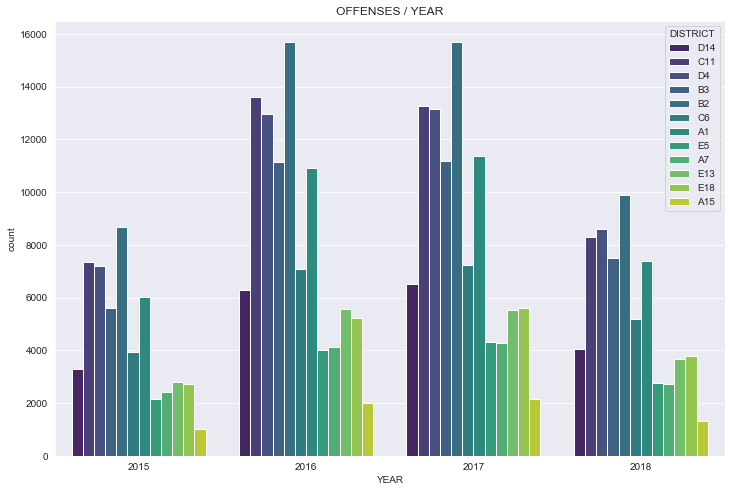

In [54]:
plt.figure(figsize=(12, 8))
sns.countplot(x='YEAR', hue='DISTRICT',palette='viridis', data=crimes)
plt.title("OFFENSES / YEAR")

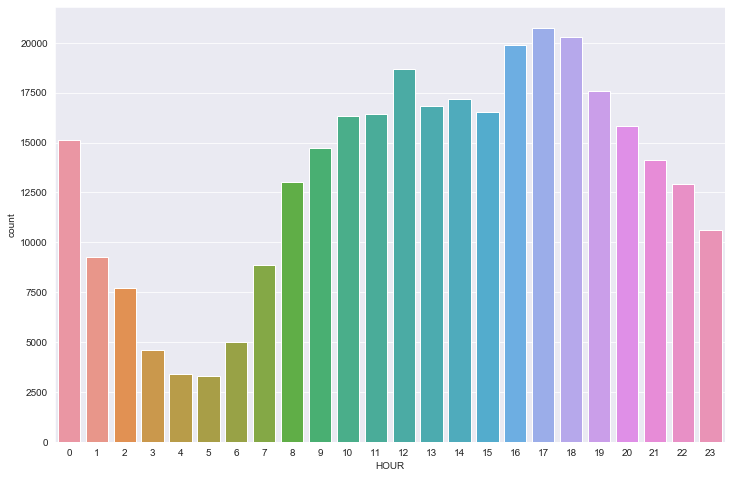

In [44]:
plt.figure(figsize=(12, 8))
sns.countplot(x='HOUR',data=crimes)

In [47]:
crimes.nunique()

INCIDENT_NUMBER        282517
OFFENSE_CODE              222
OFFENSE_CODE_GROUP         67
OFFENSE_DESCRIPTION       244
DISTRICT                   12
REPORTING_AREA            879
SHOOTING                    1
OCCURRED_ON_DATE       233229
YEAR                        4
MONTH                      12
DAY_OF_WEEK                 7
HOUR                       24
UCR_PART                    4
STREET                   4657
Lat                     18178
Long                    18178
Location                18194
dtype: int64

In [72]:
crimes['OFFENSE_CODE_GROUP'].value_counts(ascending=False).head(10)

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Drug Violation                     16548
Simple Assault                     15826
Vandalism                          15415
Verbal Disputes                    13099
Towed                              11287
Name: OFFENSE_CODE_GROUP, dtype: int64

In [55]:
crimes.drop(['INCIDENT_NUMBER'], axis=1, inplace=True)

In [62]:
crimes.isnull().sum()

OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1765
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  90
STREET                 10871
Lat                    19999
Long                   19999
Location                   0
dtype: int64

In [86]:
crimes['Long']

0        -71.139371
1        -71.060300
2        -71.072429
3        -71.078664
4        -71.090361
5        -71.071590
6        -71.082733
7        -71.105551
8        -71.070853
9        -71.058608
10       -71.040328
11       -71.053390
12       -71.087853
13       -71.087147
14       -71.096674
15       -71.073830
16       -71.066838
17       -71.077720
18       -71.096658
19       -71.068168
20        -1.000000
21       -71.071681
22       -71.080797
23       -71.139913
24       -71.093168
25       -71.055657
26       -71.072764
27       -71.061509
28       -71.061509
29       -71.087733
            ...    
319043   -71.074364
319044   -71.074364
319045   -71.058326
319046   -71.058326
319047   -71.066153
319048   -71.066153
319049   -71.089093
319050   -71.089093
319051   -71.089093
319052   -71.085748
319053   -71.085748
319054   -71.062299
319055   -71.062299
319056   -71.095603
319057   -71.097798
319058   -71.097798
319059          NaN
319060          NaN
319061   -71.085549


In [87]:
crimes['OCCURRED_ON_DATE'] = crimes['OCCURRED_ON_DATE'].apply(lambda date: date.split(' ')[0])

In [91]:
crimes['OCCURRED_ON_DATE'].nunique()

1177